<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE257-MachineLearning/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load and Examine the Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Sem2/CMPE257(ML)/housing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Display data types of each column
print("\nData Types:\n", data.dtypes)

# Basic statistics of the dataset
print("\nBasic Statistics:\n", data.describe())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Data Types:
 longitude             float64
latitude              float64
h

The initial examination of the dataset reveals the following insights:

The dataset consists of 20,640 entries and features such as longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, and ocean_proximity.
The total_bedrooms feature has 207 missing values that need to be addressed.
The data types are mostly float64, except for ocean_proximity, which is an object (likely a categorical variable).
Basic statistics provide a sense of the distribution, count, mean, min, and max values for each numerical feature. This helps us understand the scale of each feature and potential outliers.

## Step 2: Data Preprocessing
Handling Missing Values
For simplicity, we'll fill the missing values in total_bedrooms with the median of the column, as it's robust to outliers compared to the mean.

Encoding Categorical Variables
We'll convert the ocean_proximity feature into numerical format using one-hot encoding, which is suitable for nominal categorical variables without an intrinsic order.

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Imputer for handling missing values
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the total_bedrooms column
data['total_bedrooms'] = imputer.fit_transform(data[['total_bedrooms']])

# One-hot encoding for the ocean_proximity column
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[['ocean_proximity']])

# Create a DataFrame for the encoded features
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Drop the original ocean_proximity column and concatenate the new encoded features
data = data.drop('ocean_proximity', axis=1)
data = pd.concat([data, encoded_features_df], axis=1)

# Display the first few rows of the preprocessed dataframe
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


Missing values in total_bedrooms were filled with the column's median.
The ocean_proximity categorical variable was encoded into numerical format using one-hot encoding, resulting in new columns for each category with binary indicators.
The dataset is now fully numerical and ready for k-means clustering. With these modifications, we can proceed to apply k-means clustering to identify patterns or groupings within the data.

## Step 3: Determine the Optimal Number of Clusters using the Elbow Method

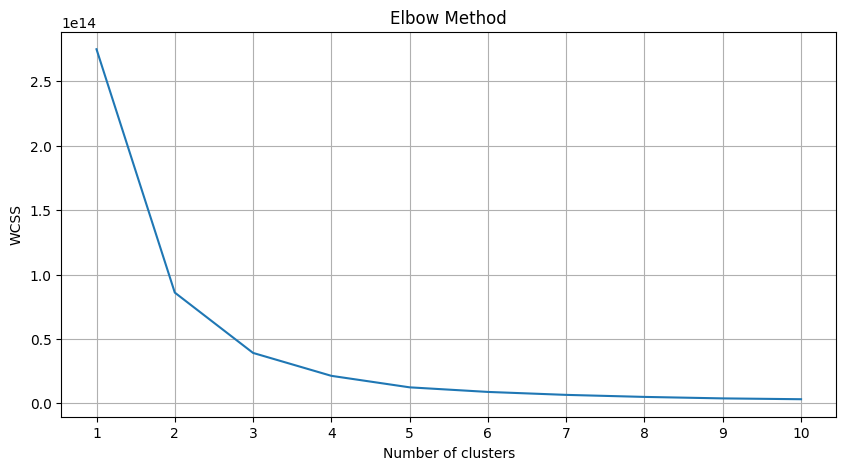

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

it appears that the WCSS (Within-Cluster Sum of Squares) decreases significantly up to 3 or 4 clusters and then the rate of decrease tapers off. This indicates that the optimal number of clusters could be around 3 or 4, as adding more clusters doesn't provide as much gain in terms of decreasing the WCSS.

## Step 4: Apply k-means Clustering

In [4]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
data['cluster'] = kmeans.fit_predict(data)

# Display the first few rows with the cluster labels
print(data.head())

# Analyze the mean values of each cluster
clustered_data_means = data.groupby('cluster').mean()
print(clustered_data_means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1   

The k-means clustering has been applied, and we've assigned each data point to one of four clusters. The first few rows of the dataset now include a 'cluster' column indicating the assigned cluster.

Upon analyzing the mean values of each cluster, we observe the following characteristics:

Cluster 0: This cluster seems to have a relatively lower median house value, moderate median income, and a larger presence of inland locations.
Cluster 1: This cluster is characterized by a higher median house value and median income, with a significant proximity to the bay area.
Cluster 2: The cluster stands out with the lowest median house value and median income, with a strong inland presence.
Cluster 3: It has a moderate median house value and income, with a balanced mix of proximity to the ocean and bay.
Each cluster represents a group of areas with similar socio-economic and geographical features. For instance, Cluster 1 could represent affluent neighborhoods near coastal areas, while Cluster 2 might represent lower-income, inland areas.

## Interpretation:
***From a business perspective***, these clusters can help in various decision-making processes such as real estate investment, targeted marketing campaigns, or regional sales strategies. For example, a company may focus on Cluster 1 for luxury goods marketing, while a different strategy might be applied to Cluster 2 where the population has a different economic profile.

## Step 5: Visualize the Clusters
We'll create visualizations for the clusters using the following approach:

Use a scatter plot to visualize the clusters based on longitude and latitude to see their geographical distribution.
Create histograms for important features like median_income and median_house_value to understand the economic distribution of the clusters.

Let's start with the geographical distribution:

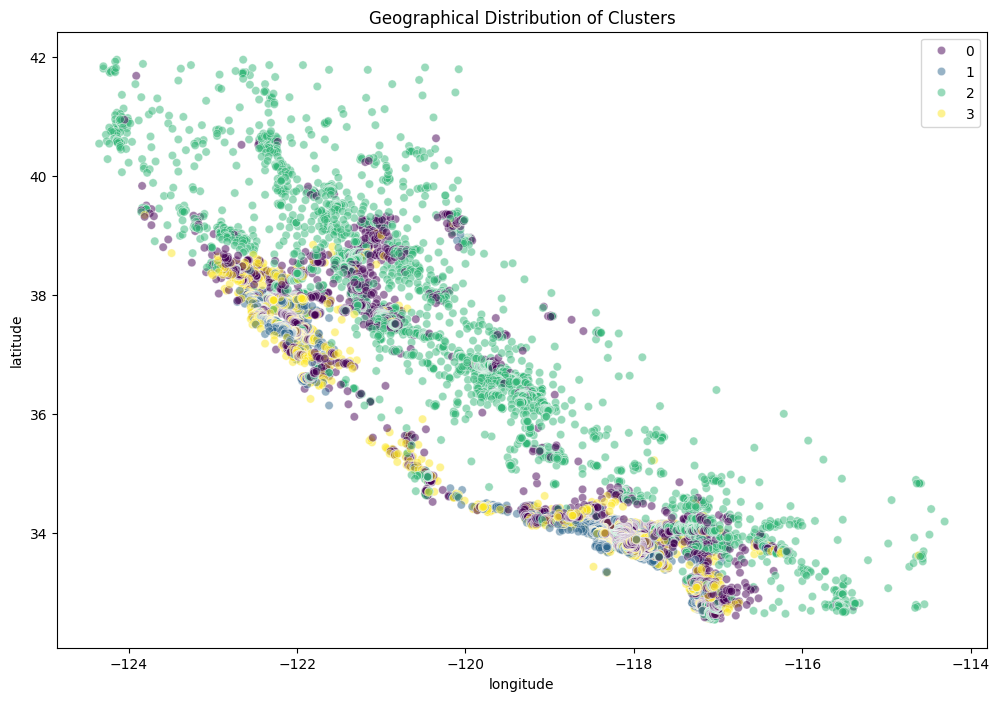

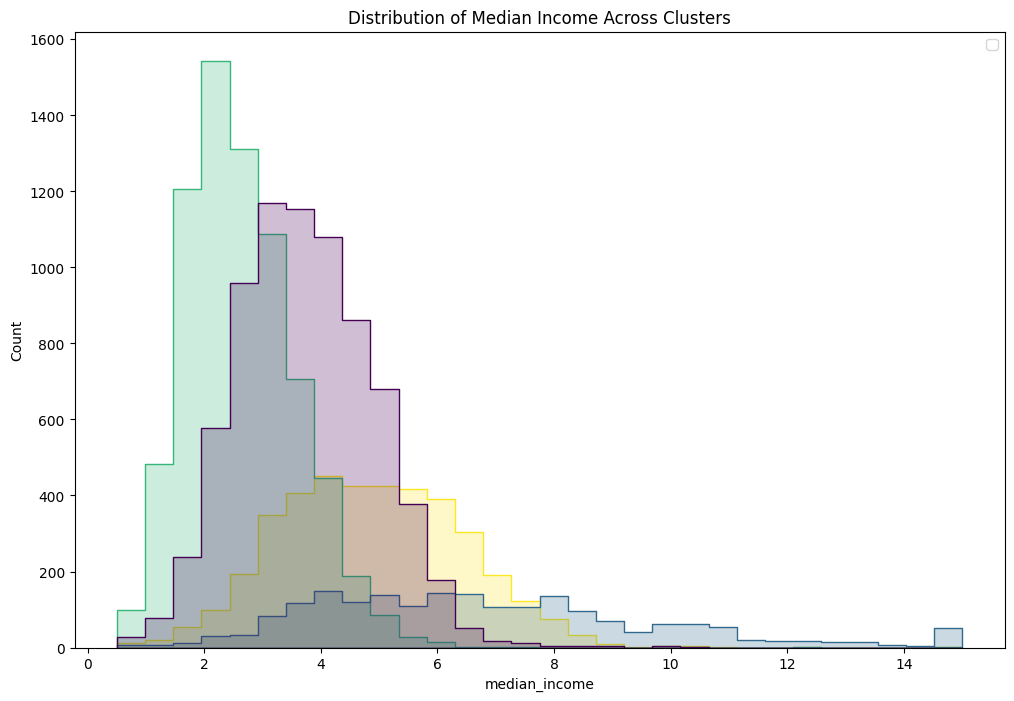

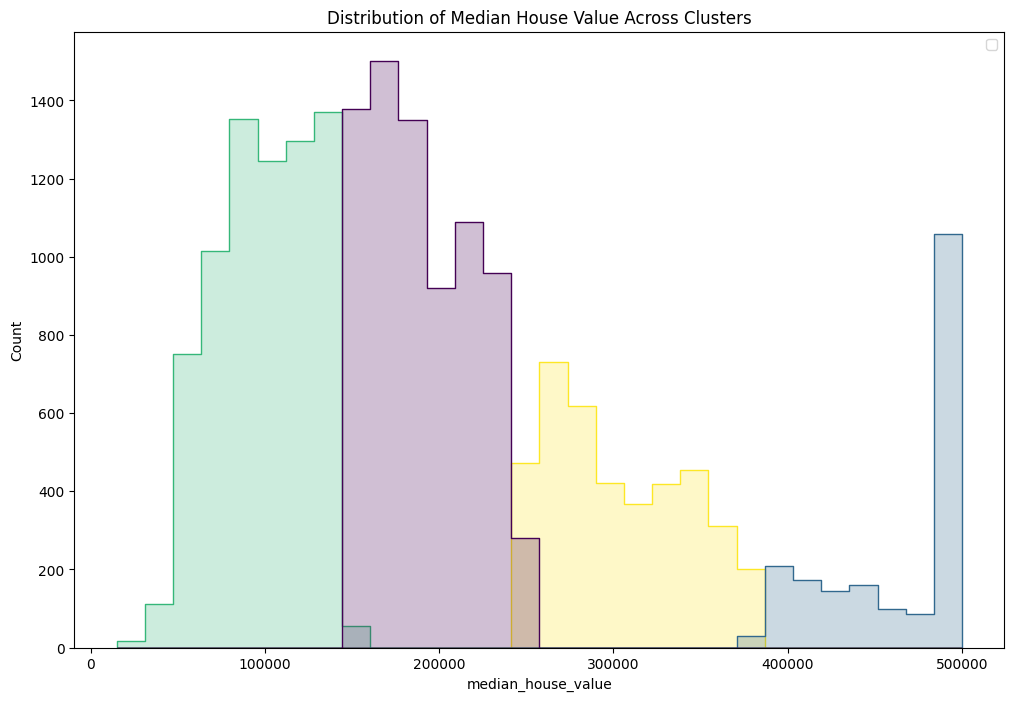

In [7]:
import seaborn as sns

# Geographical scatter plot of clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='cluster', palette='viridis', alpha=0.5)
plt.title('Geographical Distribution of Clusters')
plt.legend()
plt.show()

# Histogram of median_income for each cluster
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='median_income', hue='cluster', element='step', palette='viridis', bins=30)
plt.title('Distribution of Median Income Across Clusters')
plt.legend()
plt.show()

# Histogram of median_house_value for each cluster
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='median_house_value', hue='cluster', element='step', palette='viridis', bins=30)
plt.title('Distribution of Median House Value Across Clusters')
plt.legend()
plt.show()

1. The geographical scatter plot shows the distribution of clusters based on their longitude and latitude. Each cluster is represented by a different color, which helps in understanding the geographical separation and concentration of clusters.

2. The histogram of median_income for each cluster shows the economic distribution across the clusters. It provides insights into which clusters consist of neighborhoods with higher or lower median incomes.

3. Similarly, the histogram of median_house_value provides an economic distribution in terms of house values across different clusters.

From these visualizations, we can interpret that:

- Certain clusters are geographically concentrated, which could correlate with specific neighborhoods or areas.
- Income and house value distributions vary significantly across clusters, indicating that the k-means algorithm has captured economic strata in its clustering process.

These insights can inform various business strategies, such as regional pricing strategies, market segmentation for real estate, or targeted services based on economic profiles.